In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42

In [2]:
df_AR = pd.read_excel('../Platereader_data/tunable_TFs.xls', sheet_name = 'auto-regulation')
df_MetR = pd.read_excel('../Platereader_data/tunable_TFs.xls', sheet_name = 'MetR')
df_fadE = pd.read_excel('../Platereader_data/tunable_TFs.xls', sheet_name = 'PdhR-PfadE')
df_arnB = pd.read_excel('../Platereader_data/tunable_TFs.xls', sheet_name = 'ParnB')

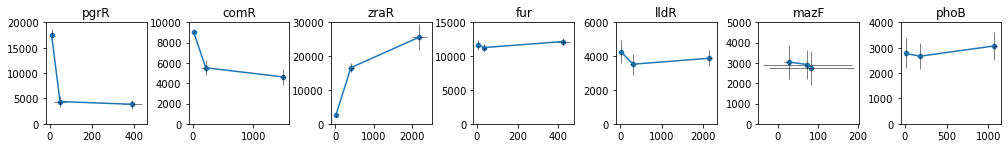

In [3]:
# Fig. S8
fig, axes = plt.subplots(figsize=(14,2), nrows=1, ncols= 7)
fig.tight_layout()
tf_list = ['pgrR','comR','zraR','fur','lldR','mazF','phoB']
promoter_list = ['pgrR','comR','zraS','fur','lldP','relA','phoB']
ymax_list = [2e4,1e4,3e4,1.5e4,6e3,5e3,4e3]
for i in range(7):
        data = df_AR[(df_AR['Promoter']==promoter_list[i])]#
        axes[i].errorbar(x = data['RFP_MEAN'], y = data['GFP_MEAN'], xerr=data['RFP_STD'], yerr=data['GFP_STD'],
            linewidth=1, linestyle='', color='k', alpha=0.5)
        sns.scatterplot(data = data, x = 'RFP_MEAN', y = 'GFP_MEAN',  ax=axes[i]);
        sns.lineplot(data = data, x = 'RFP_MEAN', y = 'GFP_MEAN',  ax=axes[i]);
        axes[i].set(ylim = (0, ymax_list[i]), title = tf_list[i],  xlabel = '', ylabel = '')

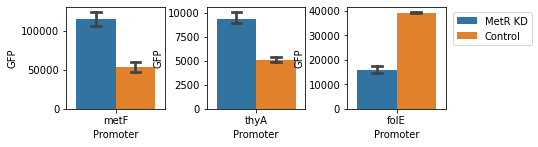

In [4]:
# Fig. 4c
fig, axes = plt.subplots(figsize=(6,2), nrows=1, ncols= 3)
fig.tight_layout()
promoter_list = ['metF','thyA','folE']
for i in range(3):
    g = sns.barplot(data=df_MetR[df_MetR['Promoter']==promoter_list[i]], x="Promoter", y="GFP", hue="Host",capsize=.1, ax = axes[i])
    g.legend_.remove()
axes[2].legend(bbox_to_anchor=(1.02, 1), loc='upper left');

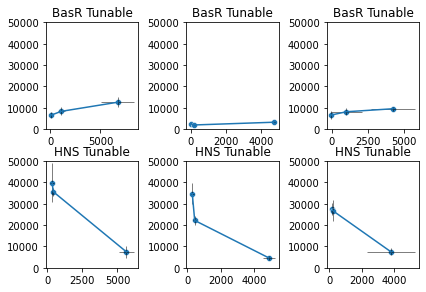

In [5]:
# Fig. S10b-d
fig, axes = plt.subplots(figsize=(6,4), nrows=2, ncols= 3)
fig.tight_layout()
tf_list = ['BasR Tunable','HNS Tunable']
condition_list = ['Control','FeSO4','FeCl3']
for i in range(2):
    for j in range(3):
        data = df_arnB[(df_arnB['Host']==tf_list[i]) & (df_arnB['Conditions']==condition_list[j])]#
        axes[i,j].errorbar(x = data['RFP_MEAN'], y = data['GFP_MEAN'], xerr=data['RFP_STD'], yerr=data['GFP_STD'],
            linewidth=1, linestyle='', color='k', alpha=0.5)
        sns.scatterplot(data = data, x = 'RFP_MEAN', y = 'GFP_MEAN',  ax=axes[i,j]);
        sns.lineplot(data = data, x = 'RFP_MEAN', y = 'GFP_MEAN',  ax=axes[i,j]);
        axes[i,j].set(ylim = (0, 5e4), title = tf_list[i],  xlabel = '', ylabel = '')

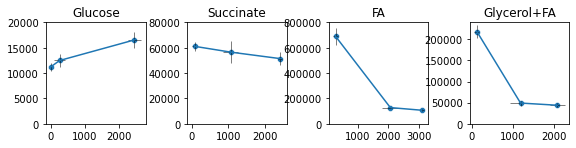

In [6]:
# Fig. S10f-i
fig, axes = plt.subplots(figsize=(8,2),  ncols= 4)
fig.tight_layout()
carbon_list = ['Glucose','Succinate','FA','Glycerol+FA']
ymax_list = [2e4,8e4,8e5,24e4]
for i in range(4):
    data = df_fadE[(df_fadE['Carbon']==carbon_list[i])]#
    axes[i].errorbar(x = data['RFP_MEAN'], y = data['GFP_MEAN'], xerr=data['RFP_STD'], yerr=data['GFP_STD'],
        linewidth=1, linestyle='', color='k', alpha=0.5)
    sns.scatterplot(data = data, x = 'RFP_MEAN', y = 'GFP_MEAN',  ax=axes[i]);
    sns.lineplot(data = data, x = 'RFP_MEAN', y = 'GFP_MEAN', ax=axes[i]);
    axes[i].set(ylim = (0, ymax_list[i]), title = carbon_list[i],  xlabel = '', ylabel = '')